In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.expand_frame_repr',False)
pd.set_option('max_colwidth',-1)

In [2]:
deliveries = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')

In [3]:
df = deliveries.copy()
df.head(2)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [4]:
def getBatsmen(df):
    batsman_first_runs = pd.DataFrame(df[['id','batsman','batsman_runs']].groupby(['id','batsman'])['batsman_runs'].first()).reset_index()
    
    boundary_names = []
    ID = []
    
    for i in range(len(batsman_first_runs)):
        if batsman_first_runs['batsman_runs'][i] == 4 or batsman_first_runs['batsman_runs'][i] == 6:
            ID.append(batsman_first_runs['id'][i])
            boundary_names.append(batsman_first_runs['batsman'][i])
            

    return ID,boundary_names

In [5]:
id,batsmen_list = getBatsmen(df)

In [6]:
req_names = pd.DataFrame({'MatchID':id,'Batsmen':batsmen_list})

In [7]:
req_names.head()

,MatchID,Batsmen
0,335983,K Goel
1,335983,MEK Hussey
2,335984,V Sehwag
3,335985,L Ronchi
4,335985,SM Pollock


In [8]:
max_count = pd.DataFrame(req_names.groupby(['Batsmen']).count()).sort_values(by = 'MatchID',ascending = False).rename(columns = {'MatchID':'Count'}).reset_index()

In [9]:
max_count.head()

,Batsmen,Count
0,RV Uthappa,25
1,V Sehwag,23
2,RG Sharma,23
3,V Kohli,21
4,KA Pollard,20


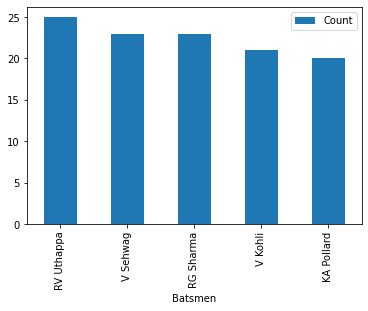

In [13]:
max_count.set_index('Batsmen').head().plot(kind = 'bar')
plt.show()